In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:
try:
    dataset = kagglehub.dataset_load(
        KaggleDatasetAdapter.PANDAS,
        "shrutimechlearn/churn-modelling",
        "Churn_Modelling.csv"
    )
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
independant_features = dataset.iloc[:,3:13]
dependant_features = dataset.iloc[:,-1]

# Feature Engineering
''''
Categorical Features: Geograpy, Gender
This can be one-hot-encoded
'''

geography = pd.get_dummies(independant_features['Geography'], drop_first = True) # If France is 1, the  both others are 0's
gender = pd.get_dummies(independant_features['Gender'], drop_first = True)

# Concatinate with actual dataset
independant_features = independant_features.drop(['Geography', 'Gender'], axis = 1)
independant_features = pd.concat([independant_features, geography, gender], axis = 1)

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independant_features, dependant_features, test_size = 0.2, random_state = 0)


'''
Feature scaling is required as all values are not at the same scale, 
and this alg uses gradient decent hence convergence to be fast enough requires feature scaling
'''
from sklearn.preprocessing import StandardScaler # Based on Z Score, and normalisation is not required b/w 1 or 0

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Creating ANN
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout

classifier = Sequential()

# Adding the first input layer
classifier.add(Dense(units=11, activation='relu')) # 11 Features to train on

# Adding the first hidden layer
classifier.add(Dense(units=10, activation='relu'))
classifier.add(Dropout(0.3))

# Adding the second hidden layer
classifier.add(Dense(units=5, activation='relu'))
classifier.add(Dropout(0.1)) # Adding Drop out, improved the model by 1%

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01) # By Default adam optimizer gives a learning rate of 0.01
classifier.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Model Training

'''
Early stopping needs to be implemented as the accuacy value starts to saturate
With epoch like 1000 it take a very very long time and post 50 epoch, accuracy saturates
'''
# model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, 
#                                epochs = 1000)

import tensorflow as tf

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model_history = classifier.fit(X_train, y_train, validation_split = 0.33, 
                               batch_size = 10, epochs = 100, callbacks = early_stop)
# With Early Stop, the fitting stopped at 21st Epoch


536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8425 - loss: 0.3737 - val_accuracy: 0.8444 - val_loss: 0.3730
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8507 - loss: 0.3634 - val_accuracy: 0.8459 - val_loss: 0.3688
Epoch 9/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8471 - loss: 0.3809 - val_accuracy: 0.8455 - val_loss: 0.3673
Epoch 10/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8511 - loss: 0.3582 - val_accuracy: 0.8523 - val_loss: 0.3672
Epoch 11/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8496 - loss: 0.3773 - val_accuracy: 0.8508 - val_loss: 0.3632
Epoch 12/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8446 - loss: 0.3734 - val_accuracy: 0.8512 - val_loss: 0.3627
Epoch 13/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8568 - loss: 0.3482 - val_accuracy: 0.8501 - val_loss: 0.3617
Epoch 14/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8512 - loss: 0.3562 - val_accuracy: 0

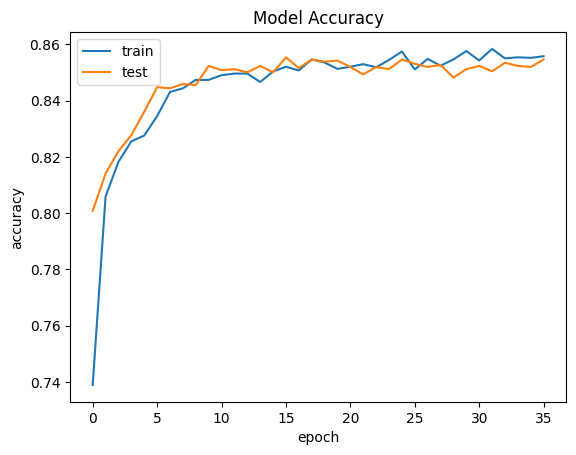

In [17]:
# Analyse the model

model_history.history.keys()
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
model_history.history.keys()
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [18]:
# Prediction and evaluating the model

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

print("Confusion Matrix", cm)
print("Accuace Score", acc_score)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Confusion Matrix [[1535   60]
 [ 214  191]]
Accuace Score 0.863


In [ ]:
classifier.get_weights()